In [1]:
%matplotlib inline

from credentials import *
import pinboard
import numpy as np

In [2]:
pb = pinboard.Pinboard(api_token)

Först lite allmän koll på bokmärkena och metadata. Läs in alla taggar och räkna dem:

In [419]:
tags = pb.tags.get()
len(tags)

512

Hitta hur många det finns av varje tagg:

In [420]:
tags[:5]

[<Tag name=""relationship"" count=15>,
 <Tag name="3d" count=346>,
 <Tag name="9" count=14>,
 <Tag name="abduction" count=1>,
 <Tag name="accessibility" count=5>]

In [421]:
taggarna = np.array([[tag.name, tag.count] for tag in tags])
taggarna[:5]

array([['"relationship"', '15'],
       ['3d', '346'],
       ['9', '14'],
       ['abduction', '1'],
       ['accessibility', '5']], dtype='<U29')

In [440]:
ensam = np.where(taggarna == '1')
ensam

(array([  3,   8,  22,  23,  25,  36,  37,  40,  43,  47,  61,  69,  71,
         76,  78,  95,  99, 101, 102, 104, 111, 114, 118, 127, 129, 132,
        133, 142, 145, 147, 148, 154, 156, 160, 166, 168, 175, 177, 179,
        185, 188, 191, 193, 196, 200, 209, 211, 223, 225, 232, 241, 246,
        255, 260, 265, 277, 279, 284, 286, 292, 294, 297, 298, 305, 312,
        318, 320, 323, 327, 330, 335, 336, 344, 351, 356, 363, 368, 372,
        374, 376, 380, 383, 384, 385, 391, 392, 395, 401, 410, 425, 426,
        437, 440, 444, 445, 448, 451, 452, 464, 471, 479, 480, 485, 486,
        488, 490, 498, 505, 507, 510]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [423]:
taggarna[ensam[0]][:5]

array([['abduction', '1'],
       ['adversarial', '1'],
       ['amplification', '1'],
       ['analysis', '1'],
       ['anthropomorphism', '1']], dtype='<U29')

In [424]:
tag = taggarna[ensam[0]][0]
tag

array(['abduction', '1'], dtype='<U29')

In [425]:
len(ensam[0])

110

In [433]:
# Denna tar lång tid!
for tag in taggarna[ensam[0]]:
    print(tag)
    #post = pb.posts.all(tag=tag[0])
    # print (post[0].url, post[0].description, '\n', tag, '\n', post[0].tags, '\n', pb.posts.suggest(url=post[0].url))
    
    
    

['abduction' '1']
['adversarial' '1']
['amplification' '1']
['analysis' '1']
['anthropomorphism' '1']
['attribution' '1']
['auctions' '1']
['autism' '1']
['balkenius' '1']
['beyond_fiction' '1']
['bruce_sterling' '1']
['choice' '1']
['citizen_science' '1']
['co-production' '1']
['cognitive_surplus' '1']
['continent' '1']
['coordination' '1']
['correspondance' '1']
['could_have_been_killed' '1']
['creation' '1']
['crypto_currencies' '1']
['csr' '1']
['curiosity' '1']
['deliberation' '1']
['depth' '1']
['destroy_win' '1']
['determinism' '1']
['dignity' '1']
['disruptive_technology' '1']
['distinction' '1']
['diversity' '1']
['ecologism' '1']
['emergence' '1']
['encryption' '1']
['escher' '1']
['etiquette' '1']
['extension_of_self' '1']
['faith_in_technology' '1']
['feature_creep' '1']
['for_the_lulz' '1']
['fractals' '1']
['friction' '1']
['fungi' '1']
['gait_recognition' '1']
['geeks' '1']
['gift_economy' '1']
['gnothi_seauton' '1']
['how_stuff_works' '1']
['human_computing' '1']
['idea

In [430]:
pb.posts.all(tag='systems')

[<Bookmark description="Habits of a Systems Thinker | heartoftheart" url="heartoftheart.uk">]

In [427]:
dead_tags = ['test']

In [413]:
# Se upp
for tag in dead_tags:
    pb.tags.delete(tag=tag)

In [428]:
rename_tags = [('test', 'test2')]

In [429]:
len(rename_tags)

1

In [418]:
# Se upp
for tag in rename_tags:
    pb.tags.rename(old=tag[0], new=tag[1])

In [410]:
pb.posts.delete(url="http://www.dn.se")

PinboardError: item not found

In [392]:
pb.tags.rename(old='Trends', new='trends')

{'result': 'done'}

In [398]:
pb.tags.delete(tag="groda")

{'result': 'done'}

In [390]:
response = pb.tags.get()


In [391]:
response[0]

<Tag name=""relationship"" count=15>

In [215]:
dates = pb.posts.dates(tag=["ethics"])

In [216]:
d = list(dates['dates'].items())

In [217]:
year_counts = [[date[0].year, date[1]] for date in d]

In [218]:
year_counts[:5]

[[2019, 1], [2019, 3], [2019, 1], [2019, 1], [2019, 1]]

In [219]:
set_of_years=set([year[0] for year in year_counts])

In [220]:
set_of_years

{2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019}

In [306]:
# Skapa en tom.
per_year = {year:0 for year in set_of_years}

In [307]:
for year in set_of_years:
    for item in year_counts:
        if item[0]==year:
            per_year[year]+=item[1]
            
per_year

{2016: 48,
 2017: 35,
 2018: 53,
 2019: 41,
 2005: 9,
 2006: 33,
 2007: 40,
 2008: 14,
 2009: 27,
 2010: 21,
 2011: 26,
 2012: 19,
 2013: 63,
 2014: 38,
 2015: 55}

In [264]:
def get_tag_distribution(tag):
    dates = pb.posts.dates(tag=[tag])
    d = list(dates['dates'].items())
    year_counts = [[date[0].year, date[1]] for date in d]
    set_of_years=set([year[0] for year in year_counts])
    per_year = {year:0 for year in set_of_years}
    for year in set_of_years:
        for item in year_counts:
            if item[0]==year:
                per_year[year]+=item[1]
    return per_year

In [296]:
current_tag = 'cars'
dist = get_tag_distribution(current_tag)
sorted(dist.items())

[(2007, 4),
 (2008, 5),
 (2009, 5),
 (2010, 13),
 (2011, 11),
 (2012, 7),
 (2013, 17),
 (2014, 29),
 (2015, 43),
 (2016, 36),
 (2017, 24),
 (2018, 20),
 (2019, 7)]

In [297]:
for tag in tags:
    if tag.count > 1000:
        print (tag.name, sorted(get_tag_distribution(tag.name).items()))

culture [(2006, 19), (2007, 59), (2008, 63), (2009, 58), (2010, 122), (2011, 125), (2012, 132), (2013, 125), (2014, 97), (2015, 102), (2016, 110), (2017, 108), (2018, 103), (2019, 24)]
education [(2006, 19), (2007, 46), (2008, 56), (2009, 105), (2010, 170), (2011, 127), (2012, 96), (2013, 102), (2014, 138), (2015, 116), (2016, 69), (2017, 93), (2018, 58), (2019, 23)]
visualization [(2006, 3), (2007, 46), (2008, 73), (2009, 112), (2010, 105), (2011, 76), (2012, 40), (2013, 132), (2014, 97), (2015, 96), (2016, 95), (2017, 115), (2018, 42), (2019, 17)]


In [298]:
dist=sorted(list(dist.items()))

In [299]:
dist

[(2007, 4),
 (2008, 5),
 (2009, 5),
 (2010, 13),
 (2011, 11),
 (2012, 7),
 (2013, 17),
 (2014, 29),
 (2015, 43),
 (2016, 36),
 (2017, 24),
 (2018, 20),
 (2019, 7)]

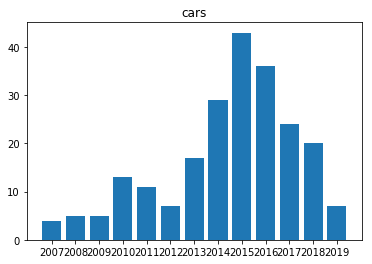

In [302]:
import matplotlib.pyplot as plt

plt.title(current_tag)
plt.bar(range(len(dist)), [item[1] for item in dist], align='center')
plt.xticks(range(len(dist)), [item[0] for item in dist])
plt.show()

In [312]:
all_dates = pb.posts.dates()

In [327]:
dates_counts = list(all_dates['dates'].items())

In [331]:
year_counts_all = [[date[0].year, date[1]] for date in dates_counts]

In [332]:
set_of_years=set([year[0] for year in year_counts_all])

In [333]:
set_of_years

{2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019}

In [334]:
per_year = {year:0 for year in set_of_years}

In [335]:
for year in set_of_years:
        for item in year_counts_all:
            if item[0]==year:
                per_year[year]+=item[1]

In [336]:
per_year

{2016: 1271,
 2017: 1308,
 2018: 1097,
 2019: 477,
 2005: 93,
 2006: 661,
 2007: 1497,
 2008: 1612,
 2009: 1913,
 2010: 2103,
 2011: 2011,
 2012: 1496,
 2013: 1602,
 2014: 1441,
 2015: 1776}

In [341]:
sum(per_year.values())

20358

In [342]:
def get_post_distribution():
    all_dates = pb.posts.dates()
    dates_counts = list(all_dates['dates'].items())
    year_counts_all = [[date[0].year, date[1]] for date in dates_counts]
    set_of_years=set([year[0] for year in year_counts_all])
    per_year = {year:0 for year in set_of_years}
    for year in set_of_years:
        for item in year_counts_all:
            if item[0]==year:
                per_year[year]+=item[1]
    return per_year

In [354]:
dist = sorted(get_post_distribution().items())

In [355]:
dist

[(2005, 93),
 (2006, 661),
 (2007, 1497),
 (2008, 1612),
 (2009, 1913),
 (2010, 2103),
 (2011, 2011),
 (2012, 1496),
 (2013, 1602),
 (2014, 1441),
 (2015, 1776),
 (2016, 1271),
 (2017, 1308),
 (2018, 1097),
 (2019, 492)]

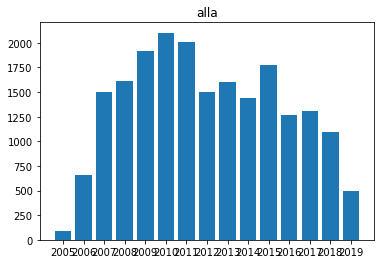

In [434]:
plt.title('alla')
plt.bar(range(len(dist)), [item[1] for item in dist], align='center')
plt.xticks(range(len(dist)), [item[0] for item in dist])
plt.show()

In [371]:
np.average(np.array(dist[1:-1])[:,1])/2000*60

45.66461538461539

In [339]:
sum([value for value in per_year.values()])

20358

In [124]:
len(ensam[0])

124

## Föreslå taggar

In [438]:
pb.posts.suggest(url="http://boingboing.net")

[{'popular': []},
 {'recommended': ['blog',
   'bloguri',
   'boingboing',
   'comm208',
   'cult',
   'culture',
   'fuckyall',
   'googlereaderstar',
   'Internet',
   'magazine']}]

In [37]:
bookmark = pb.posts.get(url='https://copenhagenletter.org/')

In [55]:
bookmark['posts'][0].save

<bound method Bookmark.save of <Bookmark description="b'The Copenhagen Letter, 2017'" url="copenhagenletter.org">>

## Vilka bokmärken har många taggar?

In [19]:
# Tar hårt på Pinboard-servern...
all_posts = pb.posts.all()

In [5]:
five_posts = all_posts[:5]

In [9]:
for post in five_posts:
    print(len(post.tags))

1
1
2
4
2


In [16]:
tags_for_all = [len(post.tags) for post in all_posts]

In [17]:
tags_for_all

[1,
 1,
 2,
 4,
 2,
 1,
 1,
 4,
 2,
 1,
 1,
 4,
 3,
 3,
 2,
 1,
 2,
 2,
 5,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 4,
 1,
 2,
 1,
 2,
 3,
 4,
 2,
 1,
 1,
 1,
 5,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 5,
 2,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 5,
 1,
 3,
 3,
 2,
 5,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 4,
 2,
 4,
 2,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 3,
 4,
 2,
 1,
 1,
 2,
 2,
 1,
 5,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 1,
 5,
 1,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 4,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 4,
 2,
 1,
 5,
 4,
 4,
 4,
 1,
 4,
 4,
 3,
 1,
 2,
 1,
 1,
 3,
 3,
 2,
 4,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 2,
 3,


In [18]:
max(tags_for_all)

8

In [49]:
tags_for_all.count(1)

10019

In [50]:
from collections import Counter

In [51]:
c = Counter(tags_for_all)

In [54]:
sorted(c.items())

[(1, 10019), (2, 7142), (3, 2578), (4, 539), (5, 84), (6, 10), (7, 2), (8, 1)]

In [41]:
tag_index = np.where(np.array(tags_for_all)==7)

In [42]:
tag_index[0]

array([ 7841, 20279])

In [43]:
np.array(all_posts)[tag_index[0]]

array([<Bookmark description="Jon Udell: Heavy Metal Umlaut" url="jonudell.net">,
       <Bookmark description="Personal Appeal - Wikimedia Foundation" url="wikimediafoundation.org">],
      dtype=object)

In [44]:
def get_multi_tags(n):
    tag_index = np.where(np.array(tags_for_all)==n)
    return np.array(all_posts)[tag_index[0]]

In [58]:
posts = get_multi_tags(6)
posts

array([<Bookmark description="Christopher Wylie om Cambridge Analytica-skandalen, vikten av att skydda sin information och det nya jobbet - Perspektiv - med Per Grankvist | Lyssna här | Poddtoppen.se" url="poddtoppen.se">,
       <Bookmark description="The Octonion Math That Could Underpin Physics | Quanta Magazine" url="www.quantamagazine.org">,
       <Bookmark description="Why Some Men Don’t Work: Video Games Have Gotten Really Good - The New York Times" url="www.nytimes.com">,
       <Bookmark description="Generating fantasy maps" url="mewo2.com">,
       <Bookmark description="Mapping the Shadows of New York City: Every Building, Every Block - The New York Times" url="www.nytimes.com">,
       <Bookmark description="A Visual and Interactive Guide to the Basics of Neural Networks – J Alammar – Explorations in touchable pixels and intelligent androids" url="jalammar.github.io">,
       <Bookmark description="Prosecutors In 'Sexting' Case Apparently Obtained Search Warrant To Photogr

In [59]:
[post.url for post in posts]

['https://poddtoppen.se/podcast/1441685144/perspektiv-med-per-grankvist/christopher-wylie-om-cambridge-analytica-skandalen-vikten-av-att-skydda-sin-information-och-det-nya-jobbet',
 'https://www.quantamagazine.org/the-octonion-math-that-could-underpin-physics-20180720/',
 'https://www.nytimes.com/2017/07/03/upshot/why-some-men-dont-work-video-games-have-gotten-really-good.html?mcubz=0',
 'http://mewo2.com/notes/terrain/',
 'https://www.nytimes.com/interactive/2016/12/21/upshot/Mapping-the-Shadows-of-New-York-City.html?_r=0',
 'https://jalammar.github.io/visual-interactive-guide-basics-neural-networks/',
 'https://www.techdirt.com/articles/20140709/07330027823/prosecutors-sexting-case-apparently-obtained-search-warrant-to-photograph-teens-penis.shtml',
 'http://www.nbc40.net/story/21083816/acfd-promotion',
 'http://www.technologyreview.com/view/508081/morality-the-next-frontier-in-human-computer-interaction/#comments',
 'http://www.nytimes.com/2012/04/22/opinion/sunday/taking-emotions-o